In [9]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from glob import glob

import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="whitegrid")
sns.set_context('paper')

In [11]:
fns = glob("./geocoding_data/RESULTS/*.csv")
df =  pd.read_csv(fns[0],index_col=0)
df["dataset"] = fns[0].split("/")[-1].rstrip("_RESULT.csv")
for fn in fns[1:]:
    name = fn.split("/")[-1].rstrip("_RESULT.csv")
    new_df = pd.read_csv(fn,index_col=0)
    new_df["dataset"]=name
    df = pd.concat((df,new_df))

In [12]:
df.head(2)

dataset_name rel_code  cooc_sample_size  adj_iteration  ngram_size  \
0       FR.txt        A                 3              1           4   
1       FR.txt       AC                 3              1           4   

   tolerance_value  epochs  embedding_dim  word2vec_iter_nb  \
0            0.002     100            256                50   
1            0.002     100            256                50   

                                index_fn                      keras_model_fn  \
0    outputs/FR.txt_100_4_0.002__A_index    outputs/FR.txt_100_4_0.002__A.h5   
1  outputs/FR.txt_100_4_0.002__A_C_index  outputs/FR.txt_100_4_0.002__A_C.h5   

                 train_test_history_fn  acccuracy@100km  acccuracy@50km  \
0    outputs/FR.txt_100_4_0.002__A.csv         0.369215        0.165106   
1  outputs/FR.txt_100_4_0.002__A_C.csv         0.790145        0.471967   

   acccuracy@25km       dataset  
0        0.053217  fr_cooc_test  
1        0.187430  fr_cooc_test

In [13]:
df = df.rename(columns={"rel_code":"Relation(s) used","dataset":"Dataset Used"})

In [14]:
print(df["Dataset Used"].unique())
new_labels = {'fr_cooc_test':"Cooccurrence Dataset (FR)",
              'fr_dataset_ambiguity_sample10percent':"Ambiguity Dataset (FR)",
              'us_fr_cooc_test':"Cooccurrence Dataset (IDF+TEXAS)",
             'us_fr_dataset_ambiguity': "Ambiguity Dataset (IDF+TEXAS)"}
df["Dataset Used"] = df["Dataset Used"].apply(lambda x: new_labels[x])

['fr_cooc_test' 'fr_dataset_ambiguity_sample10percent' 'us_fr_cooc_test'
 'us_fr_dataset_ambiguity']


/home/jacques/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


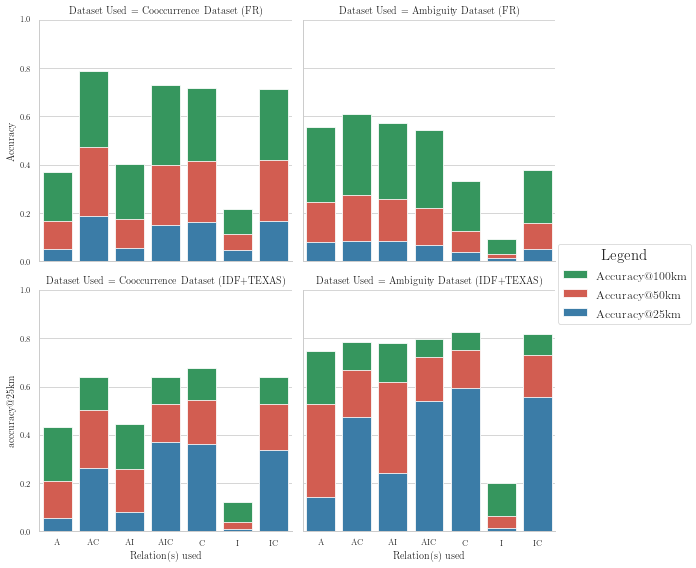

In [17]:
g = sns.FacetGrid(df, col="Dataset Used", col_wrap=2, height=4, ylim=(0, 1))


g.map(sns.barplot,"Relation(s) used", "acccuracy@100km", color="#26a65b", ci=None,label="Accuracy@100km");
g.map(sns.barplot,"Relation(s) used", "acccuracy@50km", color="#e74c3c", ci=None,label="Accuracy@50km")
g.map(sns.barplot,"Relation(s) used", "acccuracy@25km", color="#2980b9", ci=None,label="Accuracy@25km")

g.add_legend(fontsize="large",title="Legend",title_fontsize="40",frameon=True)
g.axes[0].set_ylabel('Accuracy')
plt.setp(g._legend.get_title(), fontsize=15)
#plt.savefig("../resulat_viz/geocoding_result.pdf",bbox_layout="tight")